<a href="https://colab.research.google.com/github/hajarAITADDI/hajarAITADDI/blob/main/Boston_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generate describtive statistics for Boston house dataset that summarize the central tendency, and dispresion

In [5]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

import pandas as pd

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.describe().round(2)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f162c2fc610>]],
      dtype=object)

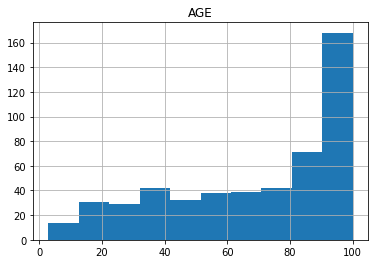

In [7]:
boston.hist(column='AGE',bins=10)

We notice that the distribution of the varibale age is non symetric, and is left-skewed, means that the mean will be less than the median. This is consistent with what the describe function reports ( mean=68.7 while median=77.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f162b8ccdd0>]],
      dtype=object)

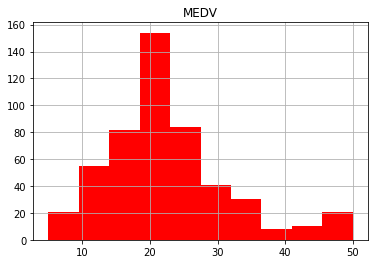

In [15]:
boston.hist(column='MEDV',color='red')

The distribution of MEDV appears normal and symmetric. The symmetry aligns with what we observed from the output of describe(), as the mean of MEDV 21.2 is close to its median 22.53. 

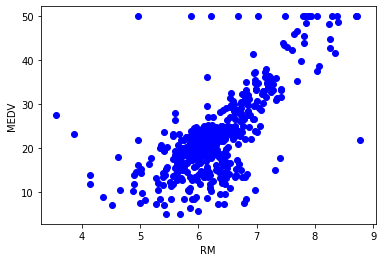

In [23]:
import matplotlib.pyplot as plt
plt.scatter(boston['RM'],boston['MEDV'], color='b')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

The figure above shows that there is a strong positive linear relationship between the MEDV (median value of owner-occupied homes in $1000’s) and RM the average number of rooms per dwelling, which means that the house value increases as the number of rooms increases. To validate our intuition, we will calculate the correlation coeficient.

In [25]:
import numpy as np
np.corrcoef(boston['RM'], boston['MEDV']).round(2)

array([[1. , 0.7],
       [0.7, 1. ]])

The value of correlation coeficient (0.7) validates our expectation

In [26]:
boston.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


the matrix above displays the correlation coeficient for all varibales in boston dataset.

Based on the correlation matrix, we notice that RM and LSTAT(percentage of lower status of the population) are the most correlated features with MEDV. 
corr(MEDV,LSTAT)=-0.74
corr(MEDV,RM)=0.7

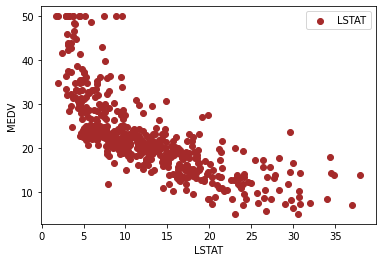

In [33]:
plt.scatter(boston['LSTAT'],boston['MEDV'], color='brown',label='LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend()
plt.show()

This figure shows that the trend of LSTAT is not linear. Thus, the best feature to predict MEDV using linear regression is the RM feature.

In [40]:
X=boston[['RM']]
print(X.shape)
Y=boston['MEDV']
print(Y.shape)

(506, 1)
(506,)


In [51]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)
model.fit(X_train,Y_train)
print(model.intercept_.round(2),model.coef_.round(2))

-30.57 [8.46]


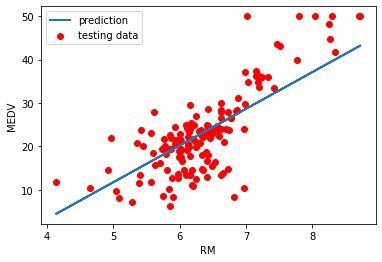

In [54]:
y_test_predicted = model.predict(X_test)

plt.scatter(X_test, Y_test,label='testing data',color='r');
plt.plot(X_test, y_test_predicted,label='prediction', linewidth=2)
plt.xlabel('RM'); plt.ylabel('MEDV')
plt.legend(loc='upper left')
plt.savefig("plot.png")
plt.show()

We calculate residuals and plot them

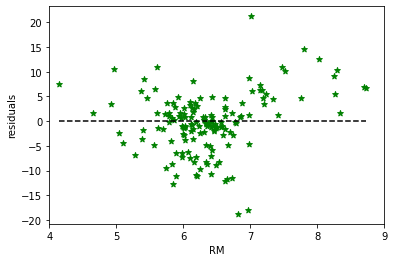

In [61]:
residuals = Y_test - y_test_predicted
plt.scatter(X_test, residuals,marker="*",color="green")
plt.hlines(y = 0,xmin = X_test.min(), xmax=X_test.max(),linestyle='--')
plt.xlim((4, 9))
plt.xlabel('RM')
plt.ylabel('residuals')
plt.savefig("plot.png")
plt.show()

In [63]:
model.score(X_test,Y_test).round(2)

0.6

R-squad (60%) means that 60% of the variation of MEDV was explained by the model